In [1]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasmita23d0385","key":"59045a4b748ed2bf18fae393a8b307e6"}'}

In [3]:
# Make a directory to store the Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# Verify the Kaggle API is set up properly
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset             10KB  2024-10-29 19:32:26           9953        182  1.0              
ikynahidwin/depression-professional-dataset                   Depression Professional Dataset                  16KB  2024-11-20 06:39:18           1194         26  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                        22KB  2024-11-11 19:11:28           4725         69  1.0              
ikynahidwin/depression-student-dataset                        Depression Student Dataset  

In [4]:
# Download the Caltech-256 dataset
!kaggle datasets download -d hasmitakurre/nasa-soil-moisture-india-dataset

Dataset URL: https://www.kaggle.com/datasets/hasmitakurre/nasa-soil-moisture-india-dataset
License(s): unknown
 98% 212M/216M [00:06<00:00, 37.2MB/s]
100% 216M/216M [00:06<00:00, 36.7MB/s]


In [5]:
# Unzip the downloaded dataset
!unzip nasa-soil-moisture-india-dataset.zip -d /content/nasa-soil-moisture-india-dataset

Archive:  nasa-soil-moisture-india-dataset.zip
   creating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-02.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-05.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-08.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-11.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-14.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-17.tif  
  inflating: /content/nasa-soi

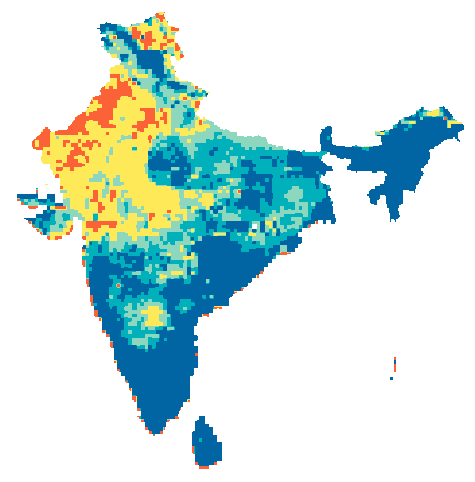

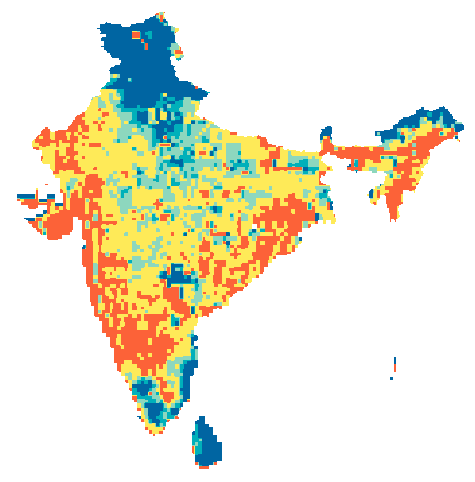

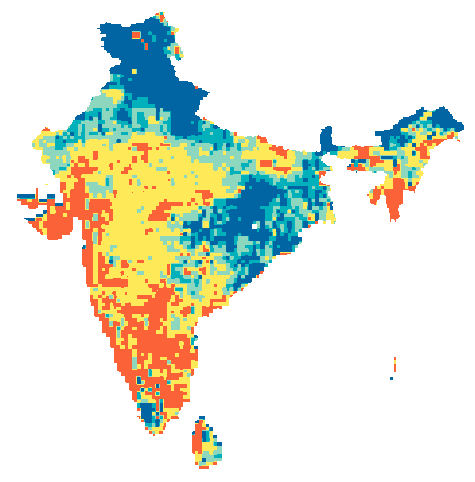

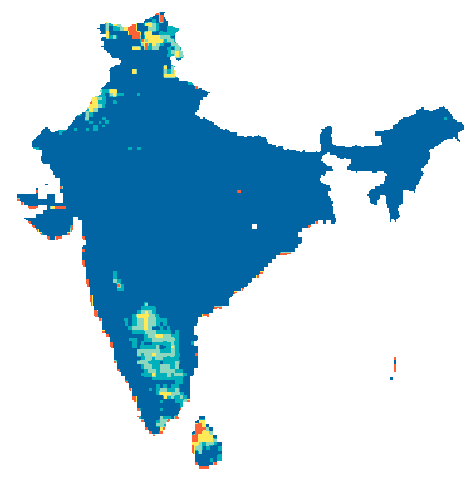

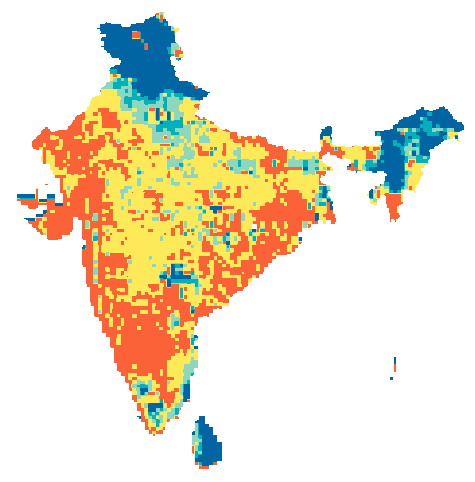

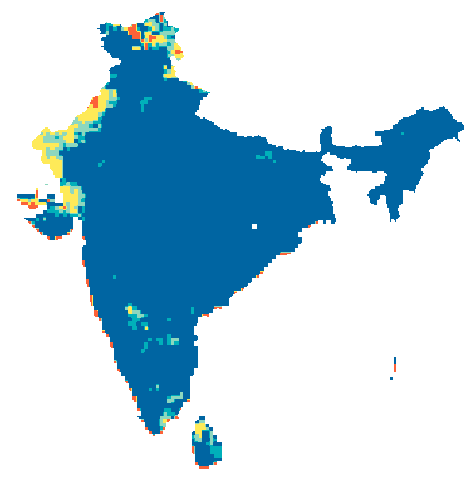

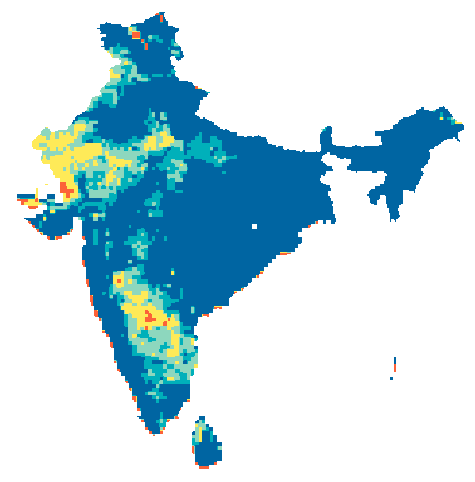

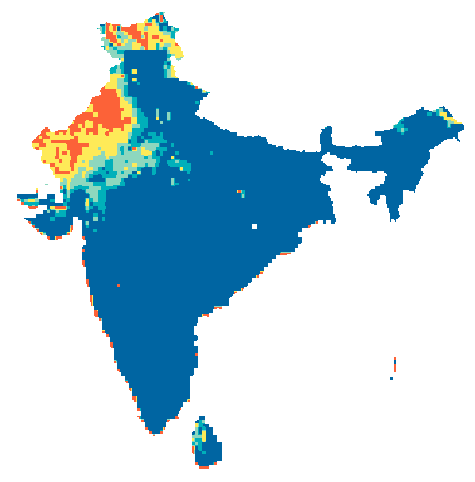

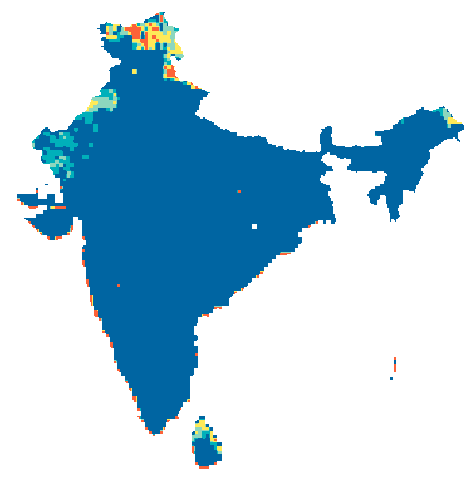

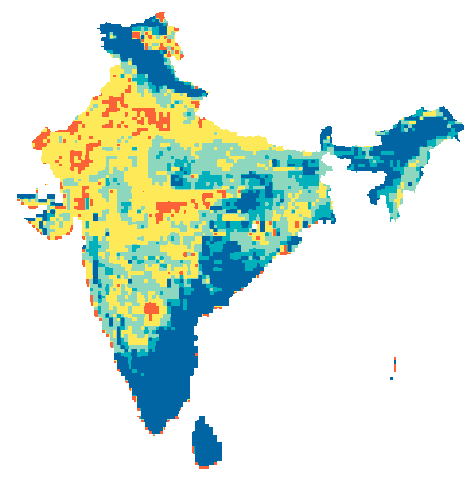

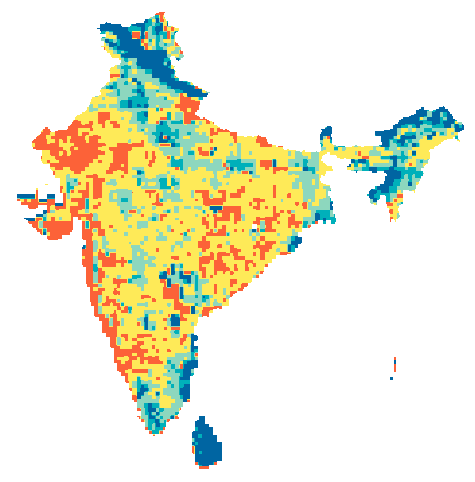

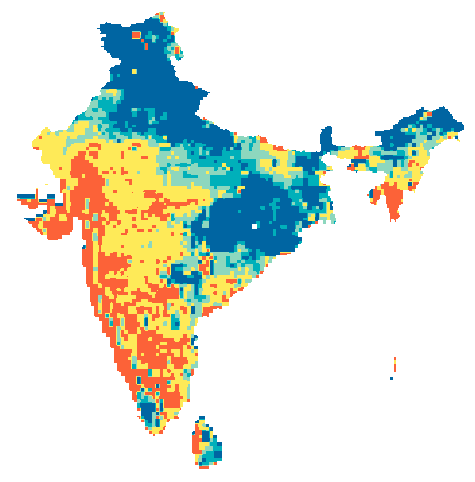

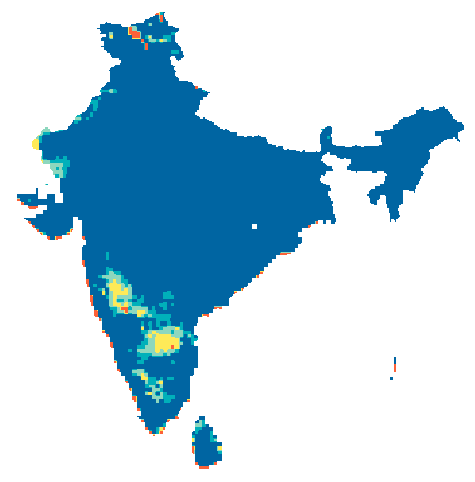

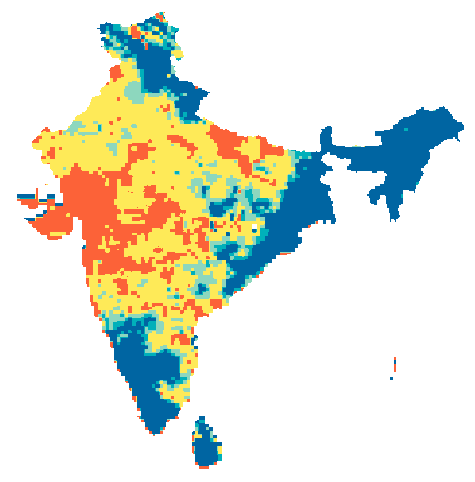

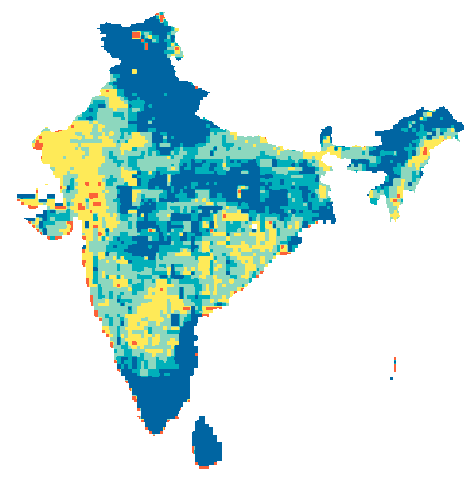

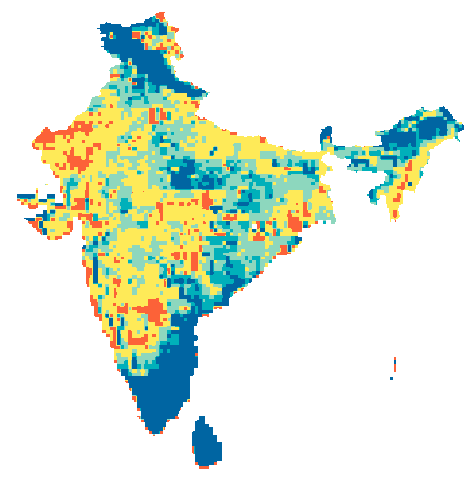

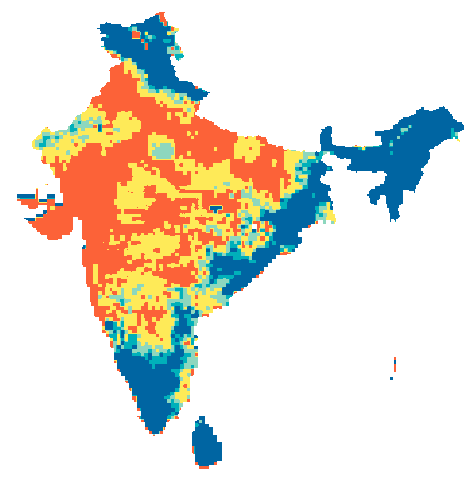

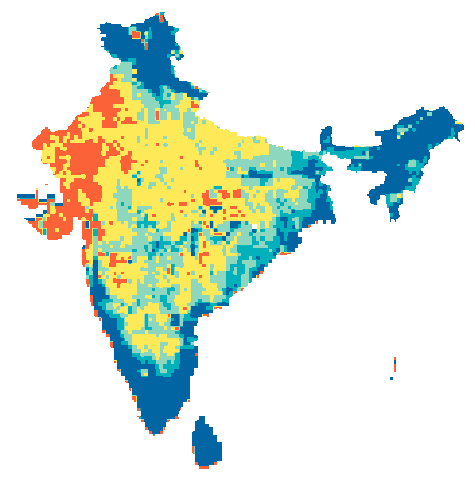

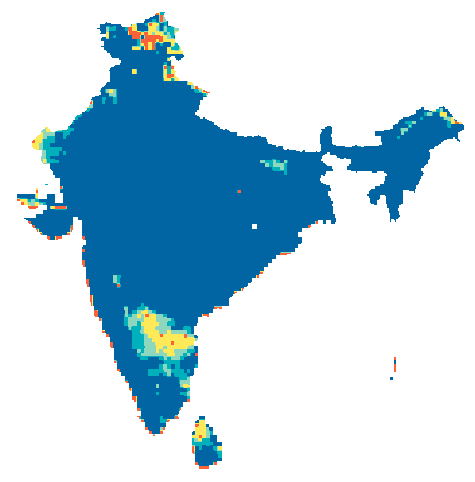

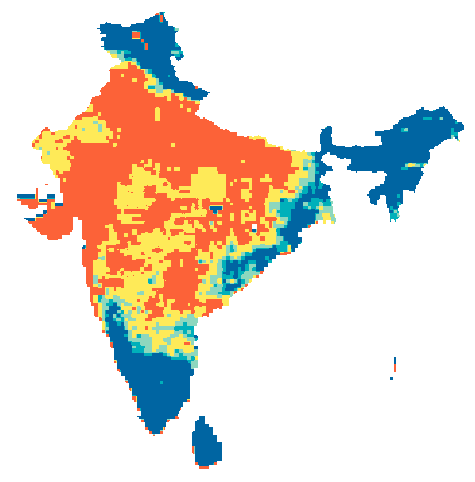

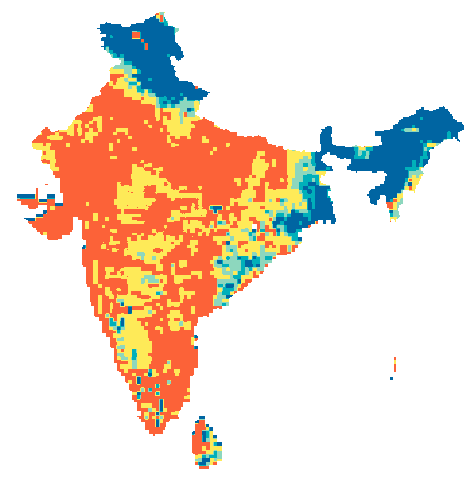

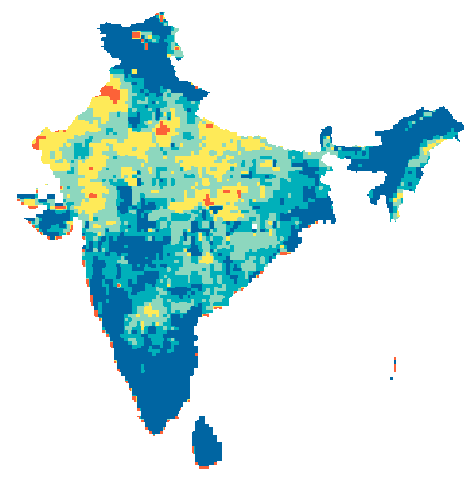

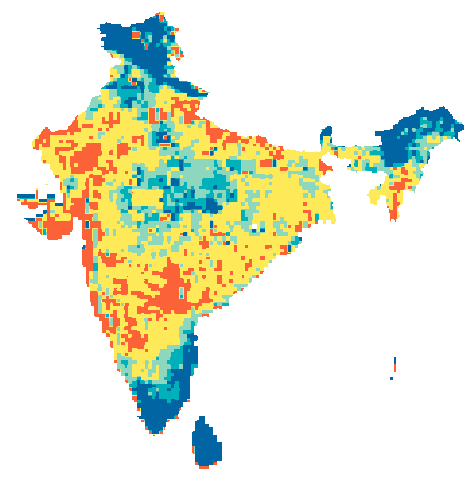

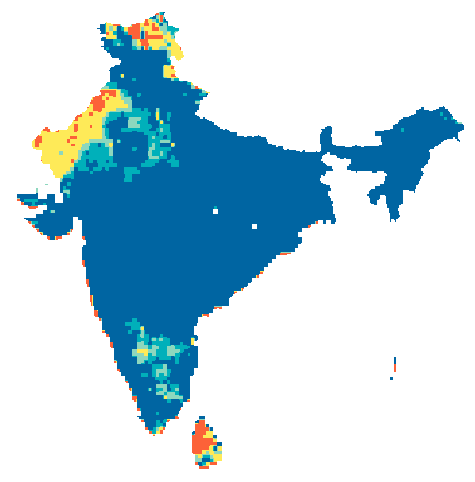

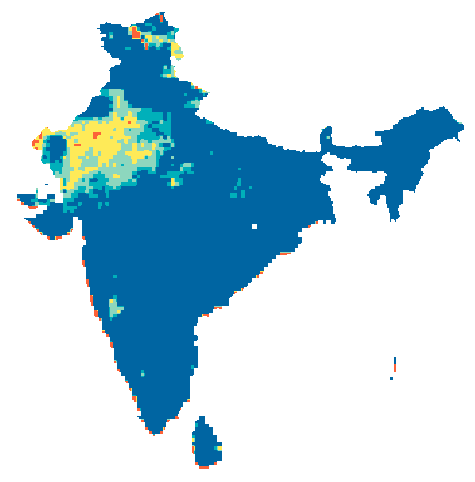

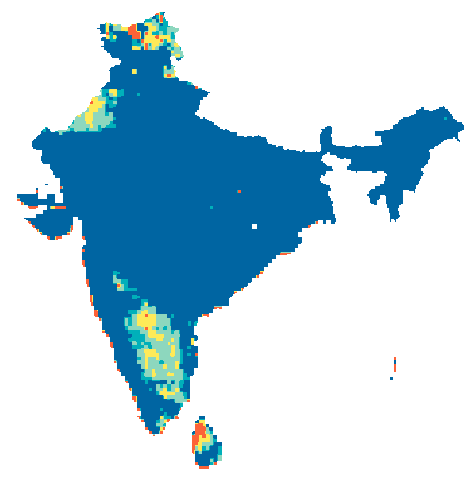

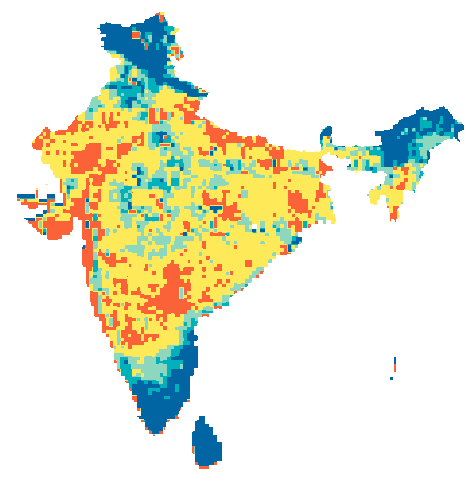

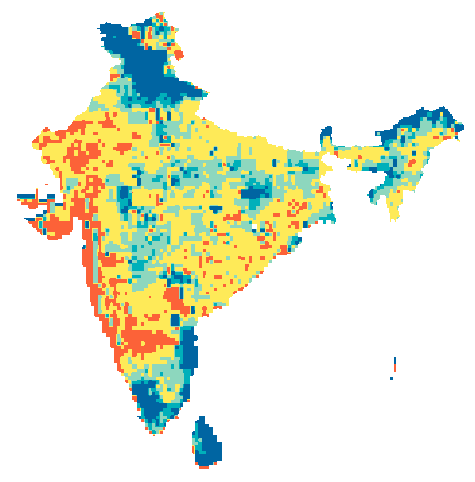

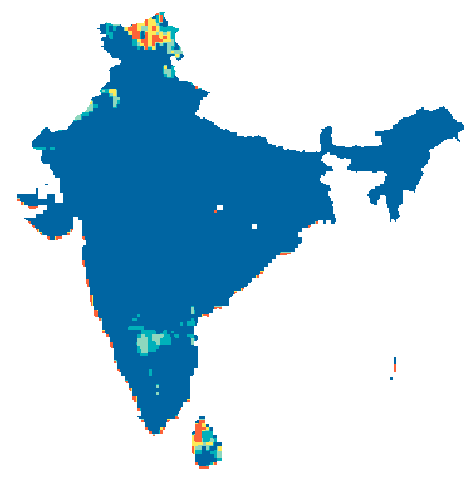

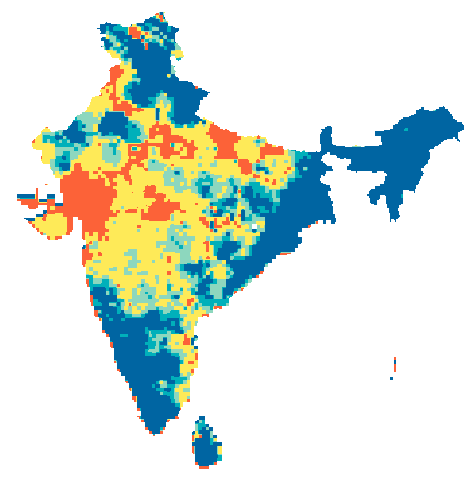

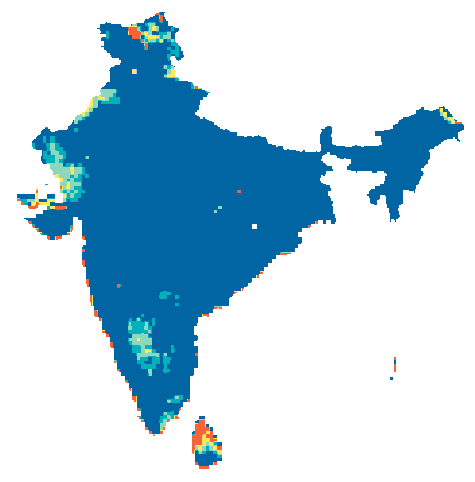

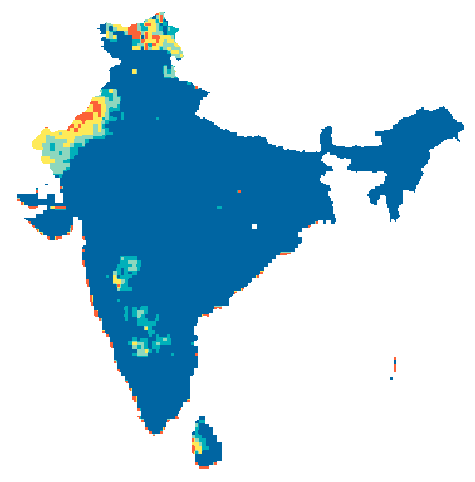

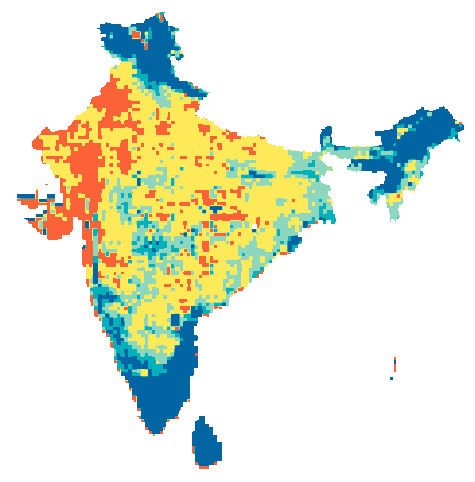

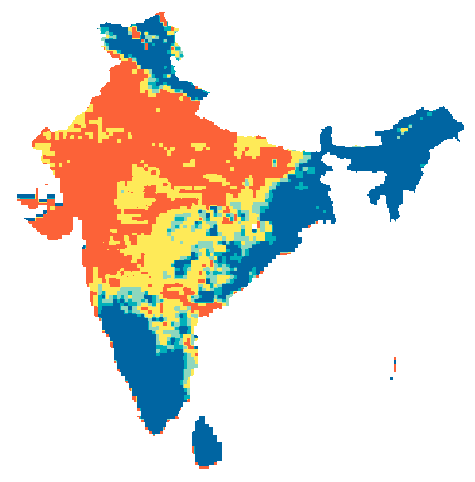

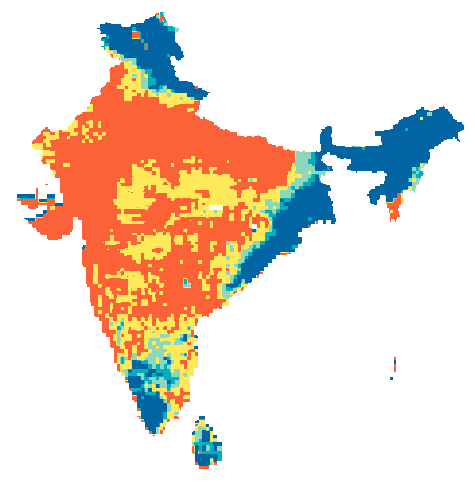

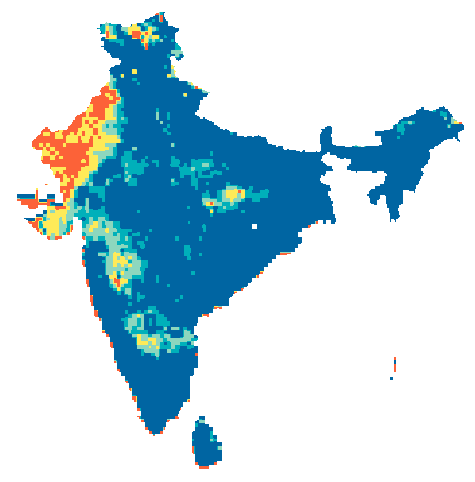

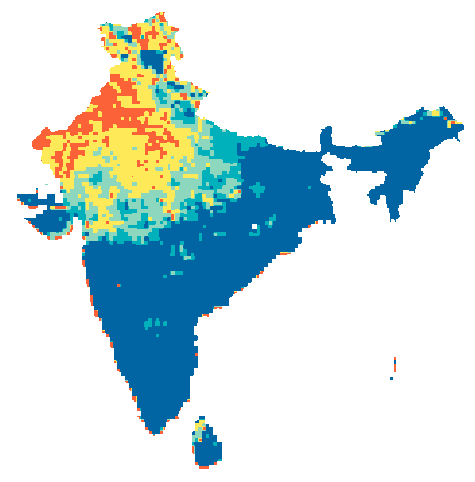

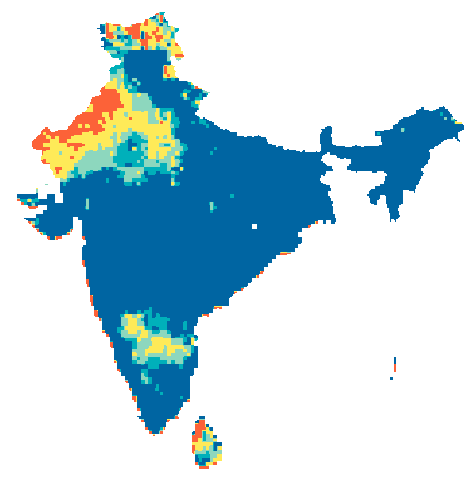

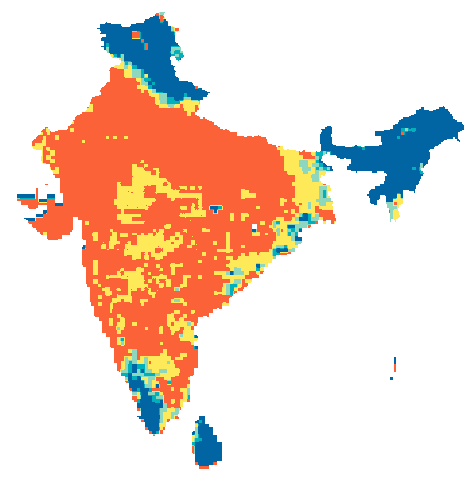

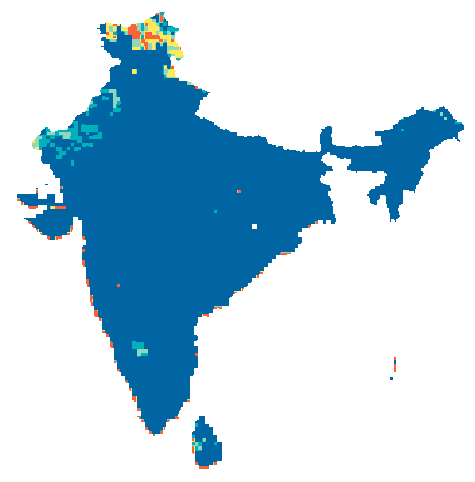

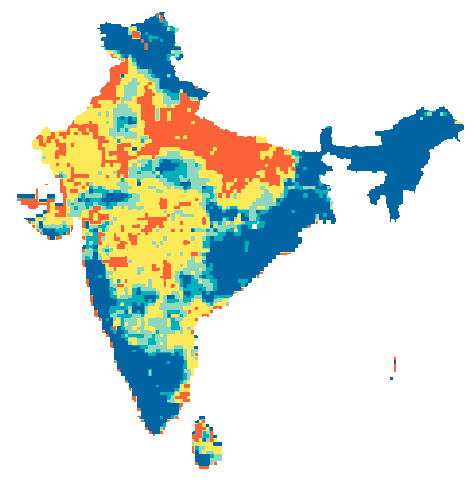

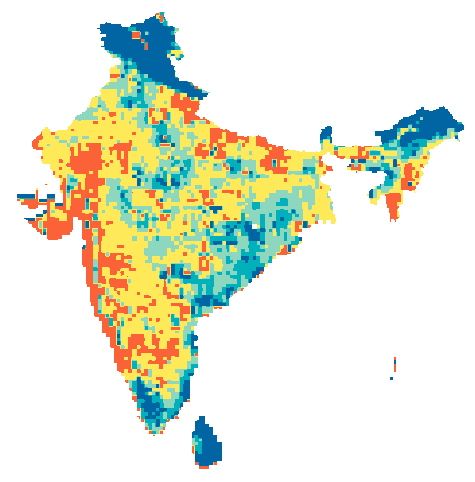

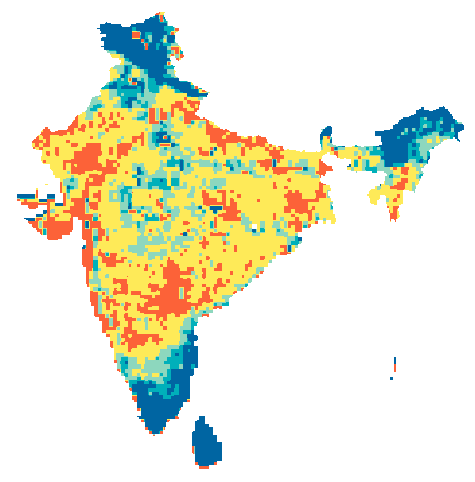

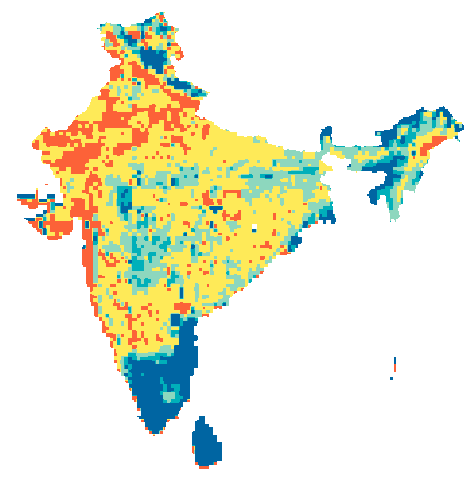

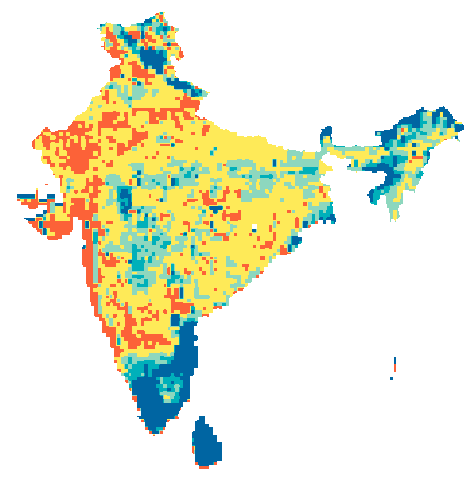

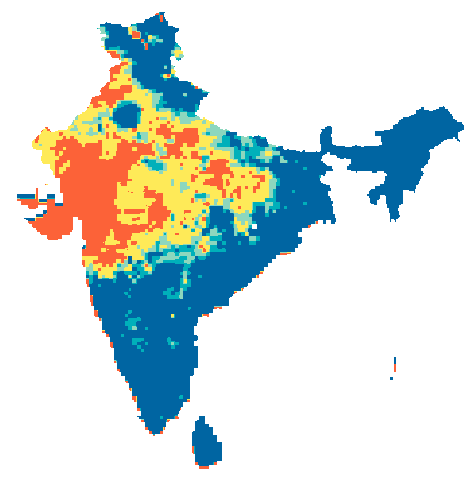

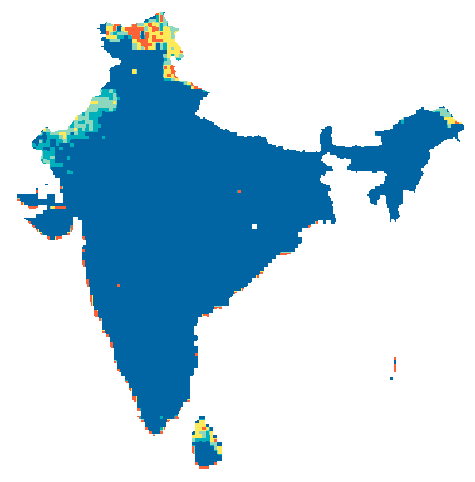

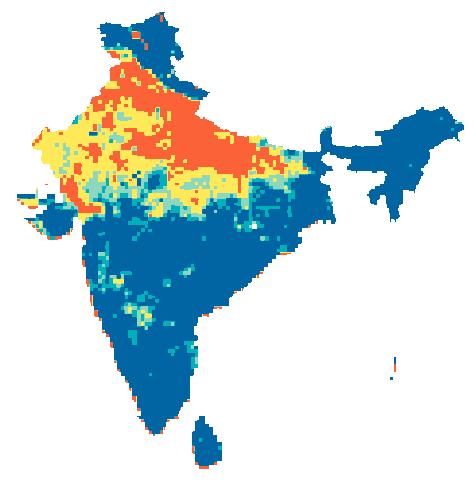

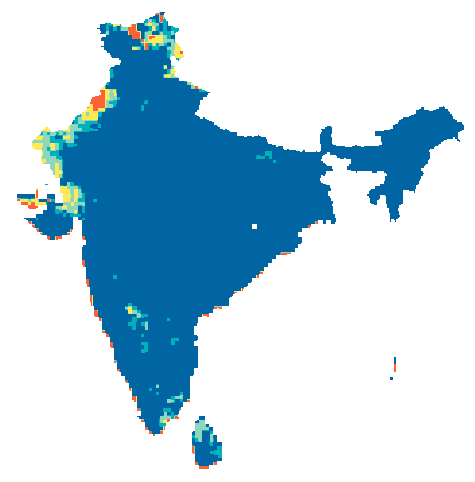

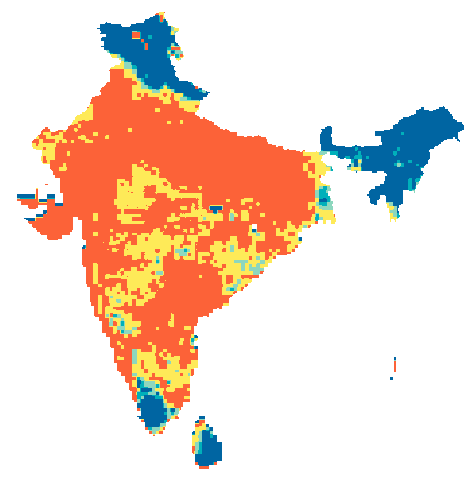

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,ListedColormap, BoundaryNorm
import os

# Define the custom color palette from visualization_params
colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Define boundaries for each color (e.g., six intervals from 0 to 0.6)
boundaries = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, custom_cmap.N, clip=True)

# Load the .tif heatmap file
def load_tif_data(tif_file):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
    return data

# Specify the directory containing the .tif files
tif_folder_path = '/content/nasa-soil-moisture-india-dataset/NASA_Soil_Moisture_India_Dataset'

# List all .tif files in the specified folder
tif_files = [f for f in os.listdir(tif_folder_path) if f.endswith('.tif')]

# Loop through each .tif file and display the heatmap
for tif_file in tif_files:
    tif_file_path = os.path.join(tif_folder_path, tif_file)

    # Load heatmap data
    heatmap_data = load_tif_data(tif_file_path)

    # Save the heatmap with the exact custom colormap
    plt.figure(figsize=(10, 6))
    plt.axis('off')  # Optional: turn off axis labels
    plt.imshow(heatmap_data, cmap=custom_cmap, norm=norm)  # Apply the custom colormap and norm
    #plt.savefig(f'/content/Raw_Data_Images/{tif_file}.png', format="png", bbox_inches="tight", dpi=300)
    #plt.close()
    plt.show()

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
from matplotlib.colors import ListedColormap, BoundaryNorm
import shutil

# Define the custom color palette from visualization_params
colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Define boundaries for each color (e.g., six intervals from 0 to 0.6)
boundaries = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, custom_cmap.N, clip=True)

# Assuming `heatmap_data` is already loaded
# heatmap_data = load_tif_data(tif_file_path)  # Uncomment if needed

# Define boundaries for each color classification
red_orange_max = 0.1  # Dry conditions (Red-orange)
yellow_max = 0.2      # Moderately dry (Yellow)
light_green_max = 0.3 # Moderate moisture (Light green)
blue_green_max = 0.4  # Higher moisture (Blue-green)
dark_blue_max = 0.5   # Highest moisture levels (Dark blue)

# Assuming heatmap_data and labels are already defined

# Define directory paths for each class
output_dirs = {
    0: "Other",  # For blank patches
    1: "Dry",
    2: "Moderate_dry",
    3: "Moderate_moisture",
    4: "Higher_moisture",
    5: "Highest_moisture",
}
path = "/content/Soil_classification_dataset_1/"

# Create directories if they don't already exist
for directory in output_dirs.values():
    os.makedirs(path + directory, exist_ok=True)

# Load the .tif heatmap file
def load_tif_data(tif_file):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
    return data

def create_patches(data, labels, patch_size):
    X = []
    y = []
    for i in range(0, data.shape[0] - patch_size + 1, patch_size):
        for j in range(0, data.shape[1] - patch_size + 1, patch_size):
            patch = data[i:i + patch_size, j:j + patch_size]
            label_patch = labels[i:i + patch_size, j:j + patch_size]

            X.append(patch)  # Collect image patches
            y.append(np.bincount(label_patch.flatten()).argmax())  # Assign the most frequent class in the patch as the label

    return np.array(X), np.array(y)

# Function to save a single patch to the corresponding folder
def save_patch(patch_data, patch_index, label, image_name):
    # Create the file path directly inside the corresponding class folder
    directory = os.path.join(path, output_dirs[label])  # Use the class folder directly
    os.makedirs(directory, exist_ok=True)  # Create the class folder if it doesn't exist

    # Rename the patch with the original image name and class
    file_path = os.path.join(directory, f"{image_name}_class_{label}_patch_{patch_index}.png")

    # Plot and save the patch
    plt.imshow(patch_data, cmap=custom_cmap, norm=norm)
    plt.axis('off')  # Turn off axis for a cleaner image
    plt.savefig(file_path, bbox_inches='tight', pad_inches=0)  # Save plot to file
    plt.close()  # Close the figure to free memory

patch_size = 32

# Specify the directory containing the .tif files
tif_folder_path = '/content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset'

# List all .tif files in the specified folder
tif_files = [f for f in os.listdir(tif_folder_path) if f.endswith('.tif')]

# Loop through each .tif file and display the heatmap
for tif_file in tif_files:
    j = j + 1
    print(j)
    tif_file_path = os.path.join(tif_folder_path, tif_file)

    # Load heatmap data
    heatmap_data = load_tif_data(tif_file_path)

    # Clip heatmap data to the specified range
    heatmap_data = np.clip(heatmap_data, 0, dark_blue_max)  # Clip values to [0, 0.5] to fit into categories

    # Initialize label array with 0 for blank/no-data regions
    labels = np.full_like(heatmap_data, 0, dtype=int)

    # Assign labels based on thresholds
    labels[(heatmap_data > 0) & (heatmap_data <= red_orange_max)] = 1               # Class 1: Red-orange (Dry)
    labels[(heatmap_data > red_orange_max) & (heatmap_data <= yellow_max)] = 2      # Class 2: Yellow (Moderately dry)
    labels[(heatmap_data > yellow_max) & (heatmap_data <= light_green_max)] = 3     # Class 3: Light green (Moderate moisture)
    labels[(heatmap_data > light_green_max) & (heatmap_data <= blue_green_max)] = 4 # Class 4: Blue-green (Higher moisture)
    labels[(heatmap_data > blue_green_max) & (heatmap_data <= dark_blue_max)] = 5   # Class 5: Dark blue (Highest moisture)

    # Verify the unique values in the label array, including 0 for blank patches
    unique_labels = np.unique(labels)
    print("Unique label values:", unique_labels)  # Expected: [ 0, 1, 2, 3, 4, 5]

    # Create patches of size 32x32
    X, y = create_patches(heatmap_data, labels, patch_size)

    # Check for valid label values
    unique_labels = np.unique(y)
    print("Unique label values after patch creation:", unique_labels)  # Should see the unique labels

    # Define color map and boundaries
    colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
    custom_cmap = ListedColormap(colors)
    boundaries = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    norm = BoundaryNorm(boundaries, custom_cmap.N, clip=True)

    # Save each patch to the appropriate folder based on its label
    for i in range(len(X)):
        save_patch(X[i], i, y[i], tif_file.split('.')[0])  # Use the tif file name (without extension)

    print("Patches have been saved to the corresponding folders.\n")

# Define the folder you want to zip and the name of the output zip file
folder_to_zip = '/content/Soil_classification_dataset_1'  # Replace with your folder path
output_zip_file = '/content/Soil_classification_dataset_3.zip'  # Replace with the desired output zip file path

# Use shutil to create a zip file
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f'Folder {folder_to_zip} has been zipped into {output_zip_file}')


1
Unique label values: [0 1 2 3 4 5]
Unique label values after patch creation: [0 3 5]
Patches have been saved to the corresponding folders.

2
Unique label values: [0 1 2 3 4 5]
Unique label values after patch creation: [0 1 2 3 5]
Patches have been saved to the corresponding folders.

3
Unique label values: [0 1 2 3 4 5]
Unique label values after patch creation: [0 5]
Patches have been saved to the corresponding folders.

4
Unique label values: [0 1 2 3 4 5]
Unique label values after patch creation: [0 2 3 4 5]
Patches have been saved to the corresponding folders.

5
Unique label values: [0 1 2 3 4 5]
Unique label values after patch creation: [0 1 2 3 5]
Patches have been saved to the corresponding folders.

Folder /content/Soil_classification_dataset_1 has been zipped into /content/Soil_classification_dataset_3.zip
